<a href="https://colab.research.google.com/github/dsikar/msc-data-science/blob/master/FilteringSignalsFrequencyDomain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtering signals in the frequency domain

#0. Dependencies

In [0]:
import numpy as np
from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio, display
import matplotlib.pyplot as plt

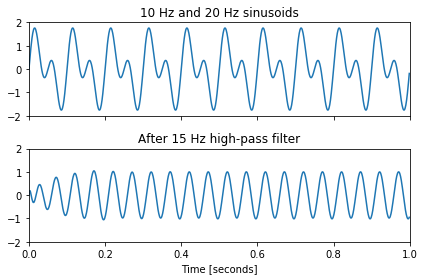

In [0]:
t = np.linspace(0, 1, 1000, False)  # 1 second
sig = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*20*t) # mix signals
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(t, sig)
ax1.set_title('10 Hz and 20 Hz sinusoids')
ax1.axis([0, 1, -2, 2])
# Design a digital high-pass filter at 15 Hz to remove the 10 Hz tone, and apply it to the signal. 
# (It’s recommended to use second-order sections format when filtering, to avoid numerical error with transfer function (ba) format):
sos = signal.butter(10, 15, 'hp', fs=1000, output='sos')
filtered = signal.sosfilt(sos, sig)
ax2.plot(t, filtered)
ax2.set_title('After 15 Hz high-pass filter')
ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

#1. Create 3 sinusoids

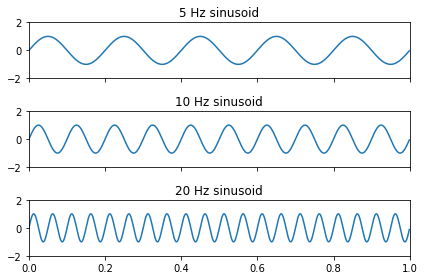

In [0]:
t = np.linspace(0, 1, 1000, False);  # 1 second
sig5Hz = np.sin(2*np.pi*5*t);
sig10Hz = np.sin(2*np.pi*10*t);
sig20Hz = np.sin(2*np.pi*20*t);
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

# 5Hz
ax1.plot(t, sig5Hz)
ax1.set_title('5 Hz sinusoid')
ax1.axis([0, 1, -2, 2])

# 10Hz
ax2.plot(t, sig10Hz)
ax2.set_title('10 Hz sinusoid')
ax2.axis([0, 1, -2, 2])

# 20Hz
ax3.plot(t, sig20Hz)
ax3.set_title('20 Hz sinusoid')
ax3.axis([0, 1, -2, 2])


plt.tight_layout()
plt.show()

#2. Mix

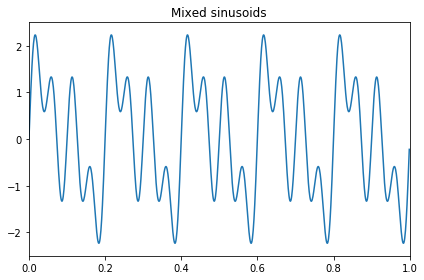

In [0]:
sigmix = sig5Hz + sig10Hz + sig20Hz;
fig, (ax1) = plt.subplots(1, 1, sharex=True)
# 5Hz
ax1.plot(t, sigmix)
ax1.set_title('Mixed sinusoids')
ax1.axis([0, 1, -2.5, 2.5])

plt.tight_layout()
plt.show()

#3. Design bandpass filter - keep 10Hz

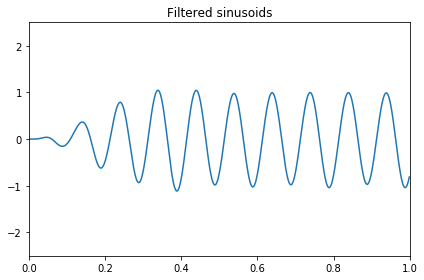

In [0]:
N = 4; # order
Wn = np.asarray([7, 12]); # bandpass
sos = signal.butter(N, Wn, btype='bandpass', fs=1000, output='sos');
filtered = signal.sosfilt(sos, sigmix)

fig, (ax1) = plt.subplots(1, 1, sharex=True)
# 5Hz
ax1.plot(t, filtered)
ax1.set_title('Filtered sinusoids')
ax1.axis([0, 1, -2.5, 2.5])

plt.tight_layout()
plt.show()

In [0]:
x = np.asarray([7, 12])
type(x)


numpy.ndarray

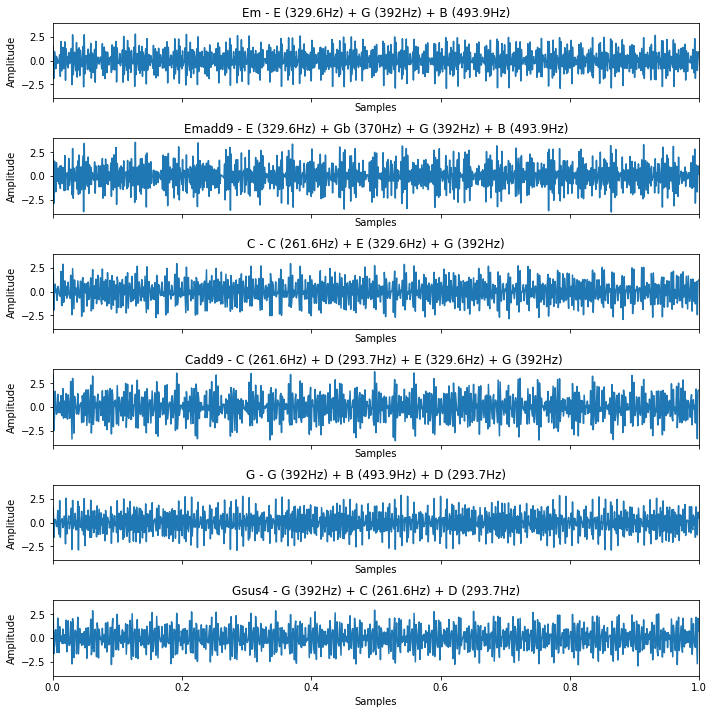

In [110]:
# set number of points to 400 for cleaner frequency plot, then to 1000 for cleaner
# spectrum plot
t = np.linspace(0, 1, 1000, False);  # 1 second
# frequency
# Em Emadd9 Em   C   Cadd9 G   Gsus4
# Em - E (329.6Hz) G (392Hz) B (493.9Hz)
E = 329.6
G = 392
B = 493.9
# Emadd9 - E (329.6Hz) Gb (370Hz) G (392Hz) B (493.9Hz)
Gb = 370
# C - C (261.6Hz) + E (329.6Hz) + G (392Hz) 
C = 261.6
# Cadd9 - C (261.6Hz) + D (293.7Hz) + E (329.6Hz) + G (392Hz) 
D = 293.7
# G - G (392Hz) + B (493.9Hz) + D (293.7Hz)
# Gsus4 - G (392Hz) + C (261.6Hz) + D (293.7Hz)

sigE = np.sin(2*np.pi*E*t);
sigG = np.sin(2*np.pi*G*t);
sigB = np.sin(2*np.pi*B*t);
sigGb = np.sin(2*np.pi*Gb*t);
sigC = np.sin(2*np.pi*C*t);
sigD = np.sin(2*np.pi*D*t);

Em = sigE + sigG + sigB;
Emadd9 = sigE + sigGb + sigG + sigB
C_chord = sigC + sigE + sigG
Cadd9 = sigC + sigD + sigE + sigG
G_chord = sigG + sigB + sigD
Gsus4 = sigG + sigC + sigD

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, sharex=True, figsize=(10,10))

# Em
ax1.plot(t, Em)
ax1.set_title('Em - E (329.6Hz) + G (392Hz) + B (493.9Hz)')
ax1.set_xlabel('Samples')
ax1.set_ylabel('Amplitude')
ax1.axis([0, 1, -4, 4])

# Emadd9
ax2.plot(t, Emadd9)
ax2.set_title('Emadd9 - E (329.6Hz) + Gb (370Hz) + G (392Hz) + B (493.9Hz)')
ax2.set_xlabel('Samples')
ax2.set_ylabel('Amplitude')
ax2.axis([0, 1, -4, 4])

# C_chord
ax3.plot(t, C_chord)
ax3.set_title('C - C (261.6Hz) + E (329.6Hz) + G (392Hz)')
ax3.set_xlabel('Samples')
ax3.set_ylabel('Amplitude')
ax3.axis([0, 1, -4, 4])

# Cadd9
ax4.plot(t, Cadd9)
ax4.set_title('Cadd9 - C (261.6Hz) + D (293.7Hz) + E (329.6Hz) + G (392Hz) ')
ax4.set_xlabel('Samples')
ax4.set_ylabel('Amplitude')
ax4.axis([0, 1, -4, 4])

# G_chord
ax5.plot(t, G_chord)
ax5.set_title('G - G (392Hz) + B (493.9Hz) + D (293.7Hz)')
ax5.set_xlabel('Samples')
ax5.set_ylabel('Amplitude')
ax5.axis([0, 1, -4, 4])

# Gsus4
ax6.plot(t, Gsus4)
ax6.set_title('Gsus4 - G (392Hz) + C (261.6Hz) + D (293.7Hz)')
ax6.set_xlabel('Samples')
ax6.set_ylabel('Amplitude')
ax6.axis([0, 1, -4, 4])

fig.tight_layout(pad=1.0)
plt.show()

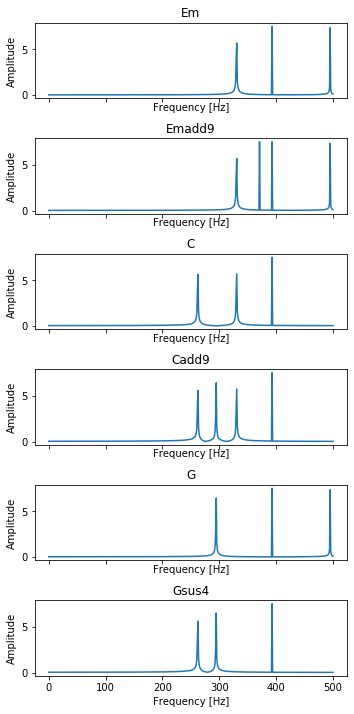

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 1000
# sample spacing
T = 1.0 / 1000
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

#fig, ax = plt.subplots(figsize=(2.5,1.5))
#ax.set_xlabel('Frequency')
#ax.set_ylabel('Amplitude')
#ax.plot(xf, np.abs(yf[:N//2]))
#plt.show()

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, sharex=True, figsize=(5,10))

# Em
# ax1.plot(t, Em)
yf = scipy.fftpack.fft(Em)
ax1.plot(xf, 15.0/N * np.abs(yf[:N//2]))
ax1.set_title('Em')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylabel('Amplitude')

# Emadd9
# ax2.plot(t, Emadd9)
yf = scipy.fftpack.fft(Emadd9)
ax2.plot(xf, 15.0/N * np.abs(yf[:N//2]))
ax2.set_title('Emadd9')
ax2.set_xlabel('Frequency [Hz]')
ax2.set_ylabel('Amplitude')

# C_chord
# ax3.plot(t, C_chord)
yf = scipy.fftpack.fft(C_chord)
ax3.plot(xf, 15.0/N * np.abs(yf[:N//2]))
ax3.set_title('C')
ax3.set_xlabel('Frequency [Hz]')
ax3.set_ylabel('Amplitude')

# Cadd9
# ax4.plot(t, Cadd9)
yf = scipy.fftpack.fft(Cadd9)
ax4.plot(xf, 15.0/N * np.abs(yf[:N//2]))
ax4.set_title('Cadd9')
ax4.set_xlabel('Frequency [Hz]')
ax4.set_ylabel('Amplitude')

# G_chord
# ax5.plot(t, G_chord)
yf = scipy.fftpack.fft(G_chord)
ax5.plot(xf, 15.0/N * np.abs(yf[:N//2]))
ax5.set_title('G')
ax5.set_xlabel('Frequency [Hz]')
ax5.set_ylabel('Amplitude')

# Gsus4
#ax6.plot(t, Gsus4)
yf = scipy.fftpack.fft(Gsus4)
ax6.plot(xf, 15.0/N * np.abs(yf[:N//2]))
ax6.set_title('Gsus4')
ax6.set_xlabel('Frequency [Hz]')
ax6.set_ylabel('Amplitude')

fig.tight_layout(pad=1.0)
plt.show()

ValueError: ignored

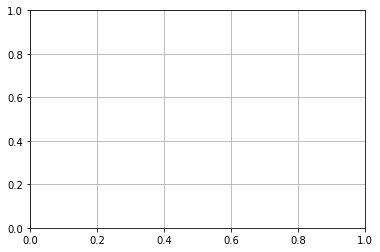

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack


t = np.linspace(0, 1, 200, False);  # 1 second
# frequency
# Em Emadd9 Em   C   Cadd9 G   Gsus4
# Em - E (329.6Hz) G (392Hz) B (493.9Hz)
E = 329.6
G = 392
B = 493.9
# Emadd9 - E (329.6Hz) Gb (370Hz) G (392Hz) B (493.9Hz)
Gb = 370
# C - C (261.6Hz) + E (329.6Hz) + G (392Hz) 
C = 261.6
# Cadd9 - C (261.6Hz) + D (293.7Hz) + E (329.6Hz) + G (392Hz) 
D = 293.7
# G - G (392Hz) + B (493.9Hz) + D (293.7Hz)
# Gsus4 - G (392Hz) + C (261.6Hz) + D (293.7Hz)

sigE = np.sin(2*np.pi*E*t);
sigG = np.sin(2*np.pi*G*t);
sigB = np.sin(2*np.pi*B*t);
sigGb = np.sin(2*np.pi*Gb*t);
sigC = np.sin(2*np.pi*C*t);
sigD = np.sin(2*np.pi*D*t);

Em = sigE + sigC + sigB;
Emadd9 = sigE + sigGb + sigG + sigB
C_chord = sigC + sigE + sigG
Cadd9 = sigC + sigD + sigE + sigG
G_chord = sigG + sigB + sigD
Gsus4 = sigG + sigC + sigD

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(Em)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fig, ax = plt.subplots()
ax.grid();
ax.plot(xf, 60.0/N * np.abs(yf[:N//2]))
plt.show()